In [1]:
# 10-important Steps, jo ap ko Exploratory Data Analyssis kartay waqt zaroor khayal main rakhni chahean.


In [2]:
# jab b kabhi ham data analysis start kartay hyn tu sab se pehlay hamen data set ko dekhna hta hy k data kia keh raha hy. Is se hamen andaza ho jata hy k data analysis k liay ready hy b ya nahi. Kia hamen is data ko pre-process karna chaheay ya nahi. Is dunia main abhi b bht sara data aisa hy jo ganda, mix, inconsistent, missing values wala ya bht zada duplicate values rakhnay wala hy is ko ham imbalance data b keh saktay hyn.

In [5]:
# Exactly, aisa hi hamara data hy na tu koi sense ban rahi hti hy na hi ready to use hta hy. Khaas tor per real world data Kaggle ya koi b online dataset se bht different hta hy.



In [6]:
# Bacho yehi wajah hy k hamen sab se pehlay data ko pakartay hi Exploratory Data Analysis (EDA) karna chayeay. Agar aap mjhy se kahen k baba g koi tip de den data scientist bannay ki, tu main kahun ga data ko samajh lo us ki zuban seekh lo phir jaisay marzi usay apnay hissab se analyze karn lena.

In [7]:
# EDA karne se hamen kia kia maloom hta hy?

#1.Data invetigation
#2.Patterns inside the data
#3.Anomalies (normal disribution hy ya skewed)
#4.hypothsis konsa or kaisay design karna
#5.Assumption konsi hni chahyeayn
#6.Data visualization (Sirf pattern dekhnay k liay)

In [8]:
# 10 THINGS FOR EDA

#1. Data Shape (columns or Rows ki taddad dekh len)
#2. Check Data structure of each column or series
#3. Missing values in each column and whole data set
#4. Split variables or make new columns if needed
#5. Type casting
#6. Summary statistics
#7. Value counts of a specific column
#8. Deal with duplicates
#9. Check the normal distribution of data (data Anomally)
#10. Correlation between two variables (columns/series)

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
#for statistcs
import scipy.stats

In [11]:
# 1. Data Shape
#python example

#1- import libraries
import pandas as pd
import numpy as np
import seaborn as sns

#2- import dataset
df = sns.load_dataset('titanic')
#3- find shape

rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)

Number of Rows       =  891
Number of Columns    =  15


In [12]:
# 2. Check Data structure of each column or series
# python code
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
# 3. Missing values in each column and whole data set
# how many missing values present
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [15]:
# We will calculated the percentage of missing values, and if the percentage of missing value is high then we will reduce the priority of that column. We can dealwith the missing values if the percentage is low by replacing them with the means, median or other methods (removal).
# percentage of missing values
df.isnull().sum() / df.shape[0] *100

# In this example we will not consider the column name deck as the percentage of missing value is quite high (77.22%).



survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [16]:
# 4. Split variables or make new columns if needed
# making a dataframe for example using pandas library

df1 = pd.DataFrame(np.array([["Lahore, Pakistan",67, 100], ["Beijing, China", 5, 6], ["berlin, Germany", 8, 9]]),
                   columns=['address', 'males', 'females'])
df1.head()

,address,males,females
0,"Lahore, Pakistan",67,100
1,"Beijing, China",5,6
2,"berlin, Germany",8,9


In [17]:
# # if we want to separate address into city and country columns we will split like this
df1[['city', 'country']] = df1['address'].str.split(',', expand=True)
#to see the results
df1.head()

,address,males,females,city,country
0,"Lahore, Pakistan",67,100,Lahore,Pakistan
1,"Beijing, China",5,6,Beijing,China
2,"berlin, Germany",8,9,berlin,Germany


In [18]:
# 5. Type casting
# We can use astype() function from pandas.
#python code
# how to see the types in first place
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      object
 2   females  3 non-null      object
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [19]:
# convert data type into integer
df1[['males', 'females']] = df1[['males', 'females']].astype('int')
#convert to string
df1[["city", "country"]] = df1[["city", "country"]].astype('str')

In [23]:
#you can use these examples for your data as well
#Replace Data Types to Boolean
#df["IsPurchased"] = df['IsPurchased'].astype('bool')
#Replace Data Types to Float
#df["Total Spend"] = df['Total Spend'].astype('float')
#Replace Data Types to Datetime with format= '%Y%m%d'
#df['Dates'] = pd.to_datetime(df['Dates'], format='%Y%m%d')

In [24]:
# 6. Summary statistics
# This gives us all the basic statistcal summary about the data count, mean, std, min, max and percent quantiles of the dataframe for each column as shown here:

df.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [26]:
# 7. Value counts of a specific column
# This will let us know, k kis column main kitni values hyn.

df['age'].value_counts()

# As you can see there are several columns where you can also find the duplicate values.



24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [27]:
# 8. Deal with duplicates
# find duplicates
df[df.embark_town == 'Queenstown']

#this will show the people only embarked from Queenstown in Titanic.

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


<AxesSubplot:xlabel='age', ylabel='Count'>

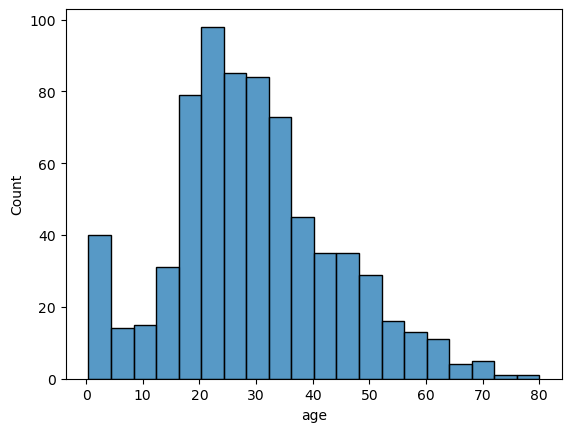

In [28]:
# 9. Check the normal distribution of data (data Anomally)
# plot histogram
sns.histplot(df['age'])

In [29]:
# If you want to measure the skewness and kurtosis of the distribution, you can use the code down below;
#measure its skewness and kurtosis
df['age'].agg(['skew', 'kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

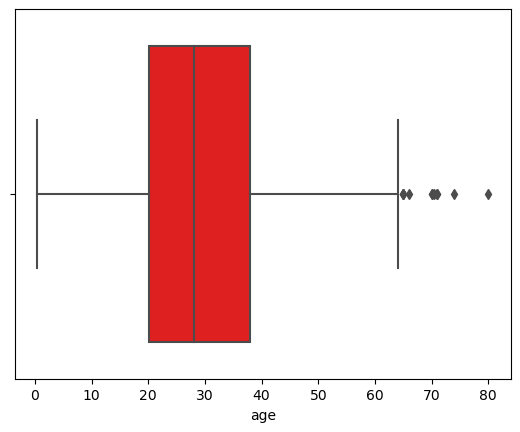

In [31]:
# We see here that the age distribution was skewed to the right. Now, Let’s check the outlier for the total_bill column with Boxplot.
sns.boxplot(df['age'], color="red")

# It can be seen clearly that outliers were starting after 40. It is up to you to deal with outliers. You can drop the outliers or do data transformation. Here, I put the options that you can do to transform non-normal distributions.



In [32]:
# 10. Correlation between two variables (columns/series)
# Checking the correlation between variables is also necessary to see potential a feature that we can use for further analysis or building a model later. We can use a correlation matrix to get this.
# drawing correlation
corr = df.corr(method="pearson") # you can use spearman if you want
corr 
# this will display a correlation matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

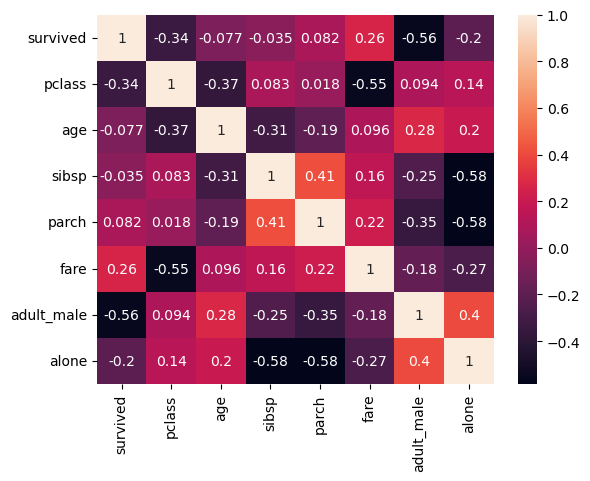

In [33]:
# We can also draw a heatmap of correlation matrix instead of reading number
sns.heatmap(corr, annot=True)
# this will show the numbers with colors

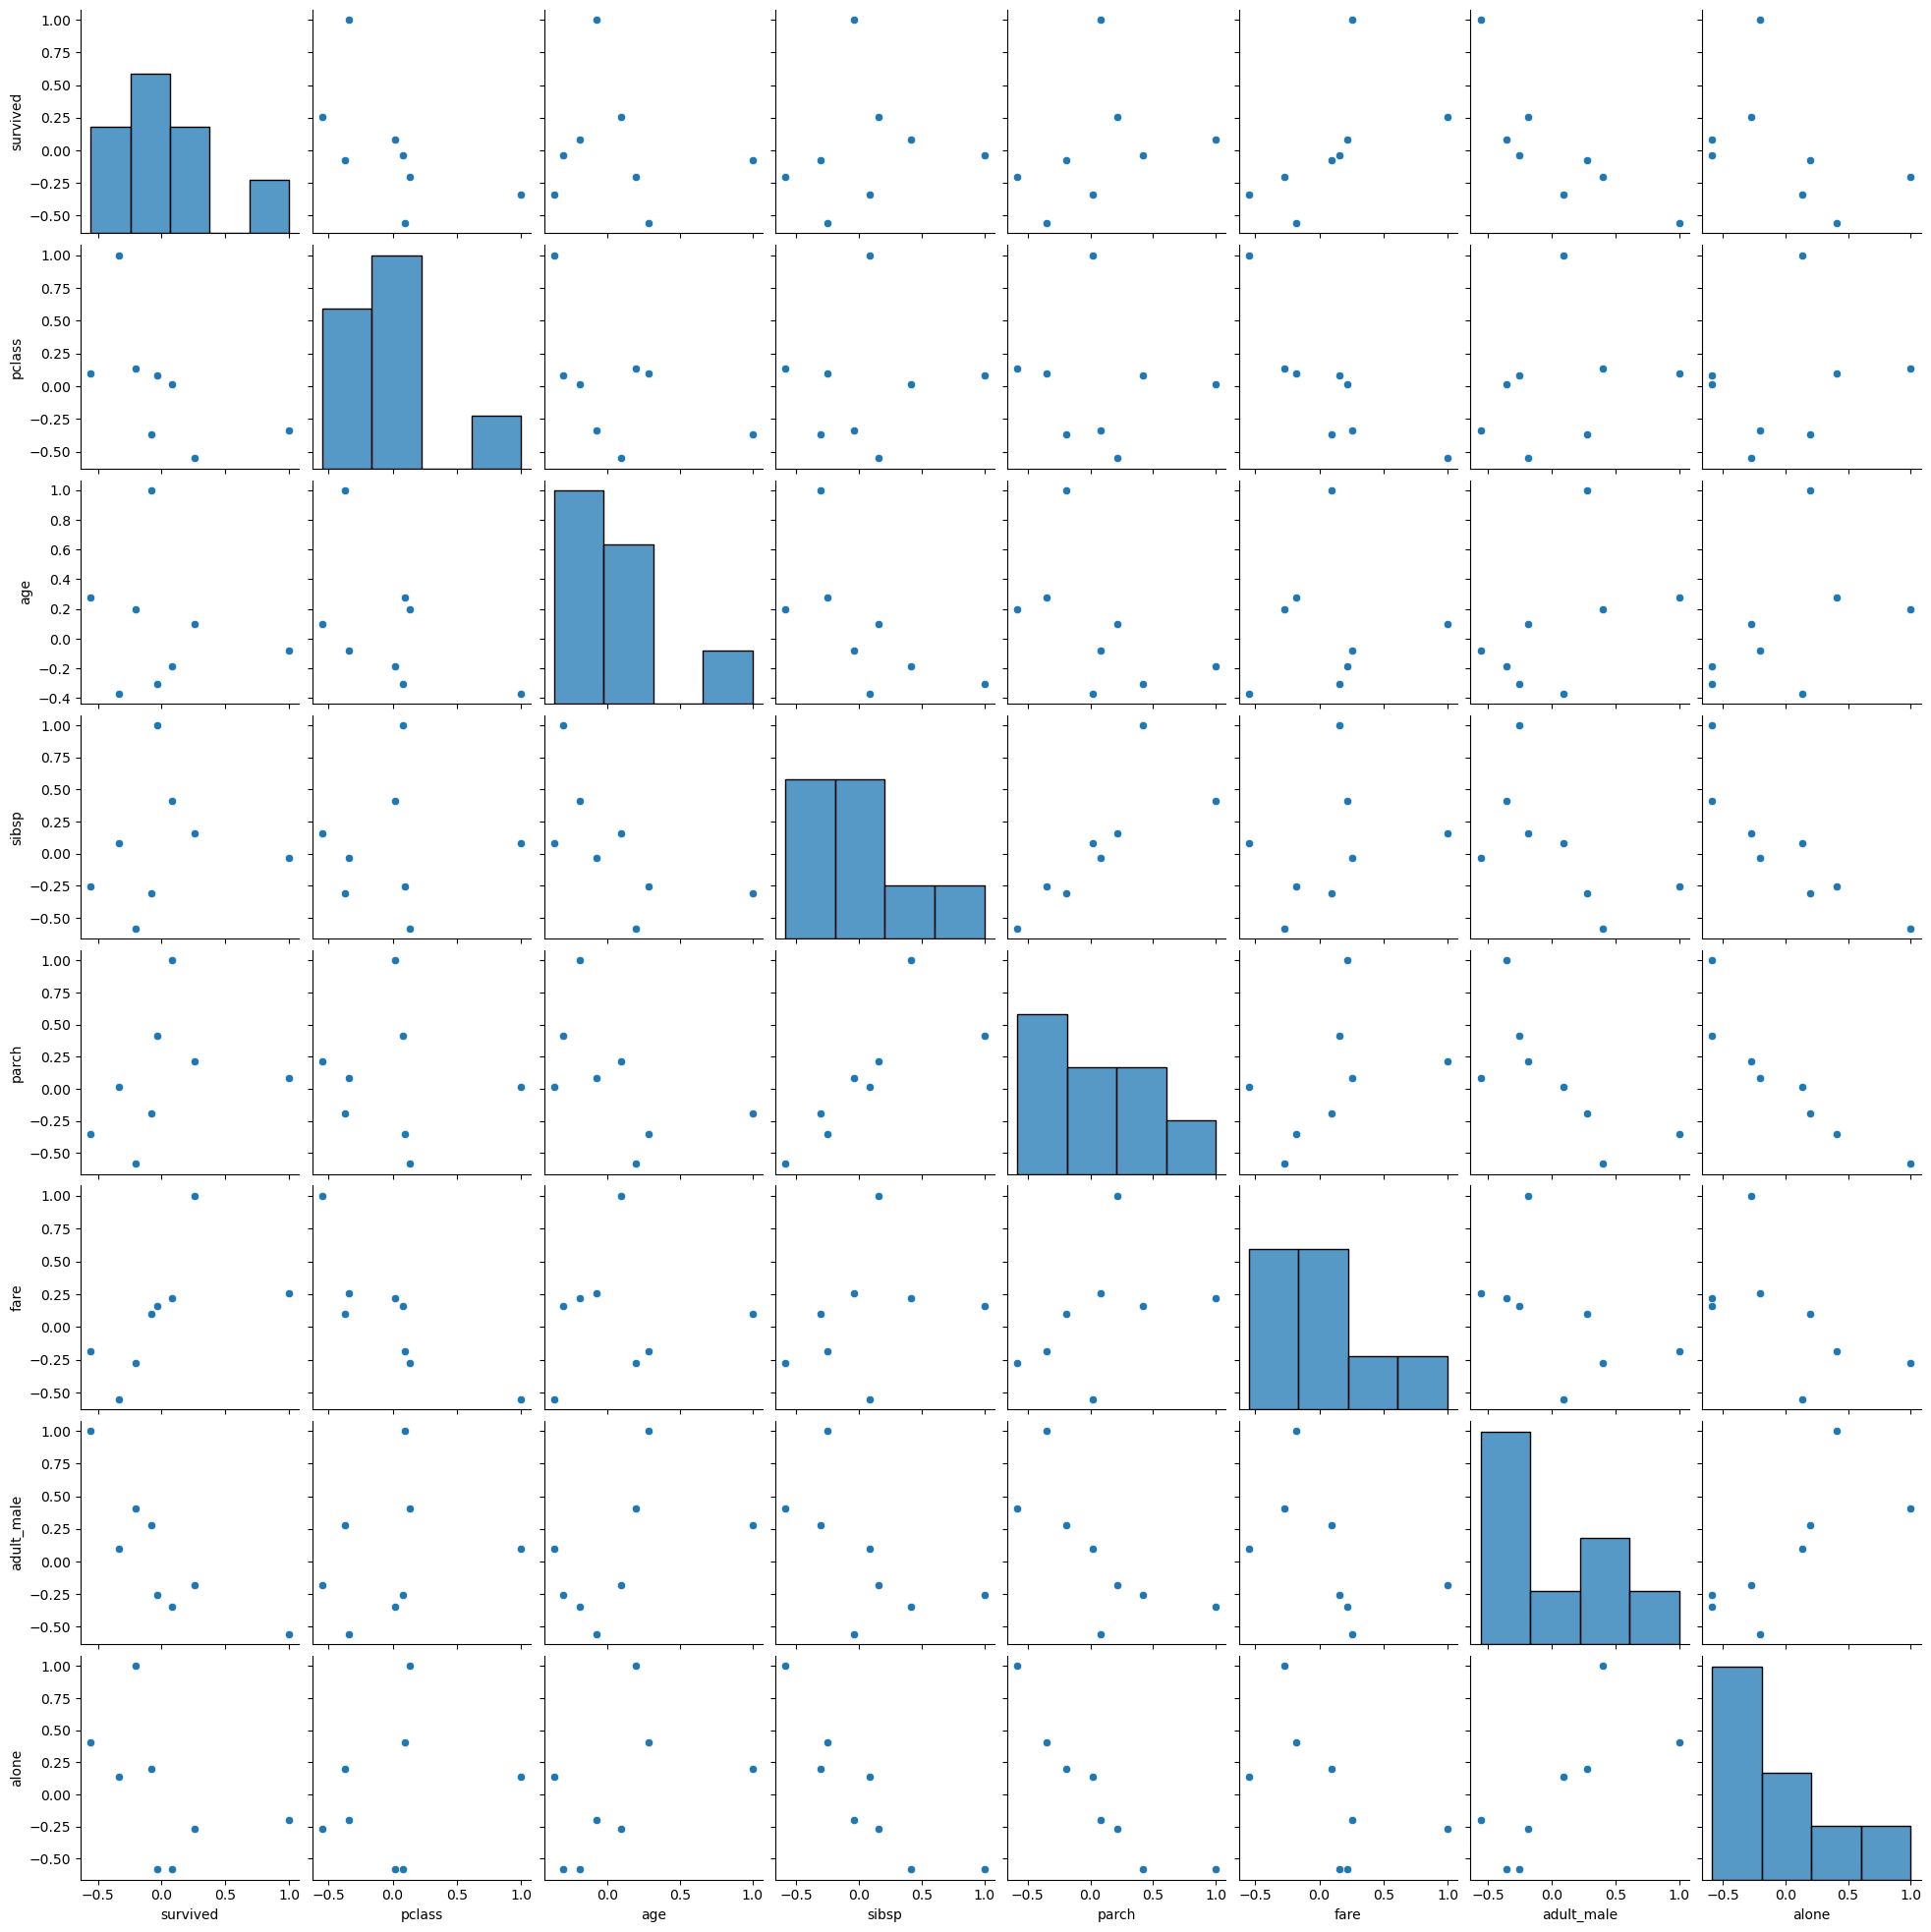

In [34]:
# # we can also draw a pairplot to see the correlation
sns.pairplot(corr)

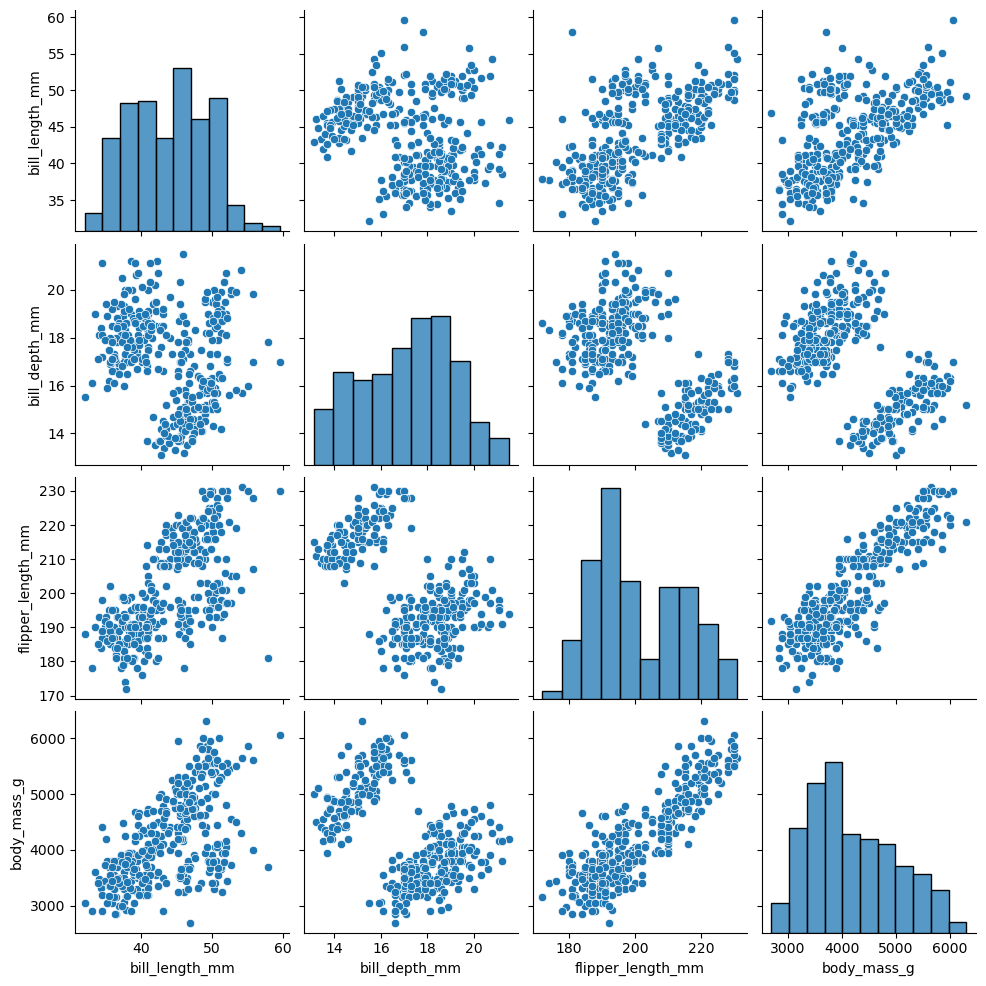

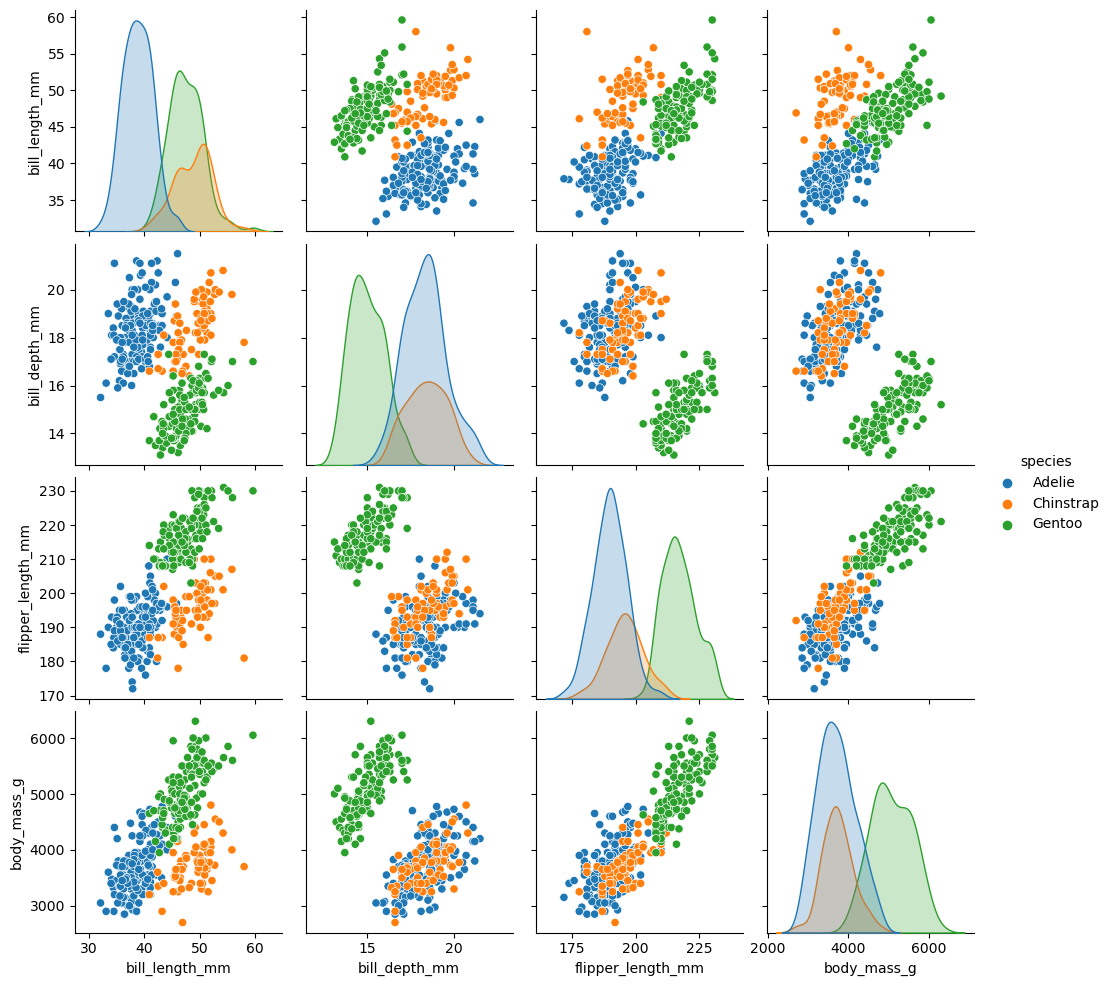

In [35]:
# # we can change the points based on category
# import a new dataset
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins)
sns.pairplot(penguins, hue="species")

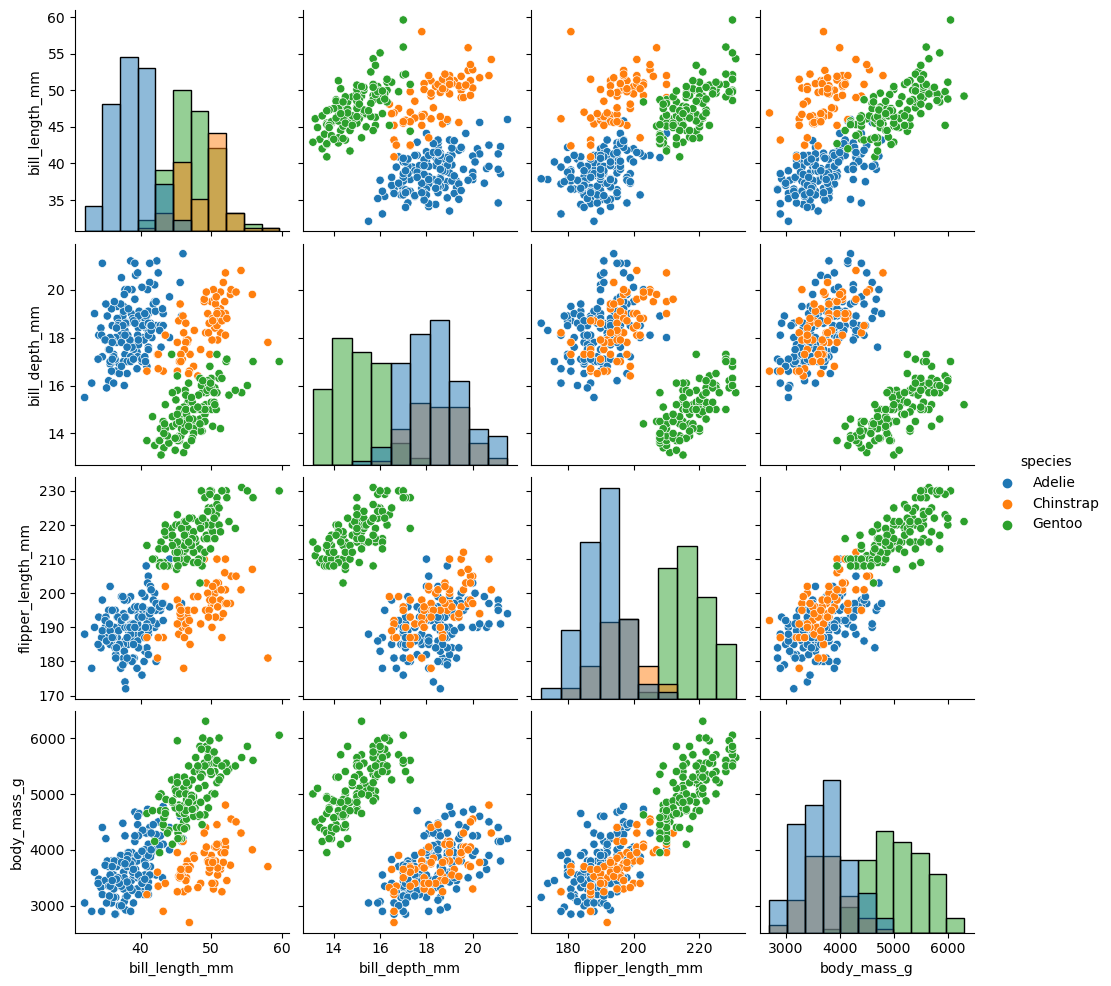

In [36]:
# we can convert this into histograms
sns.pairplot(penguins, hue="species", diag_kind="hist")

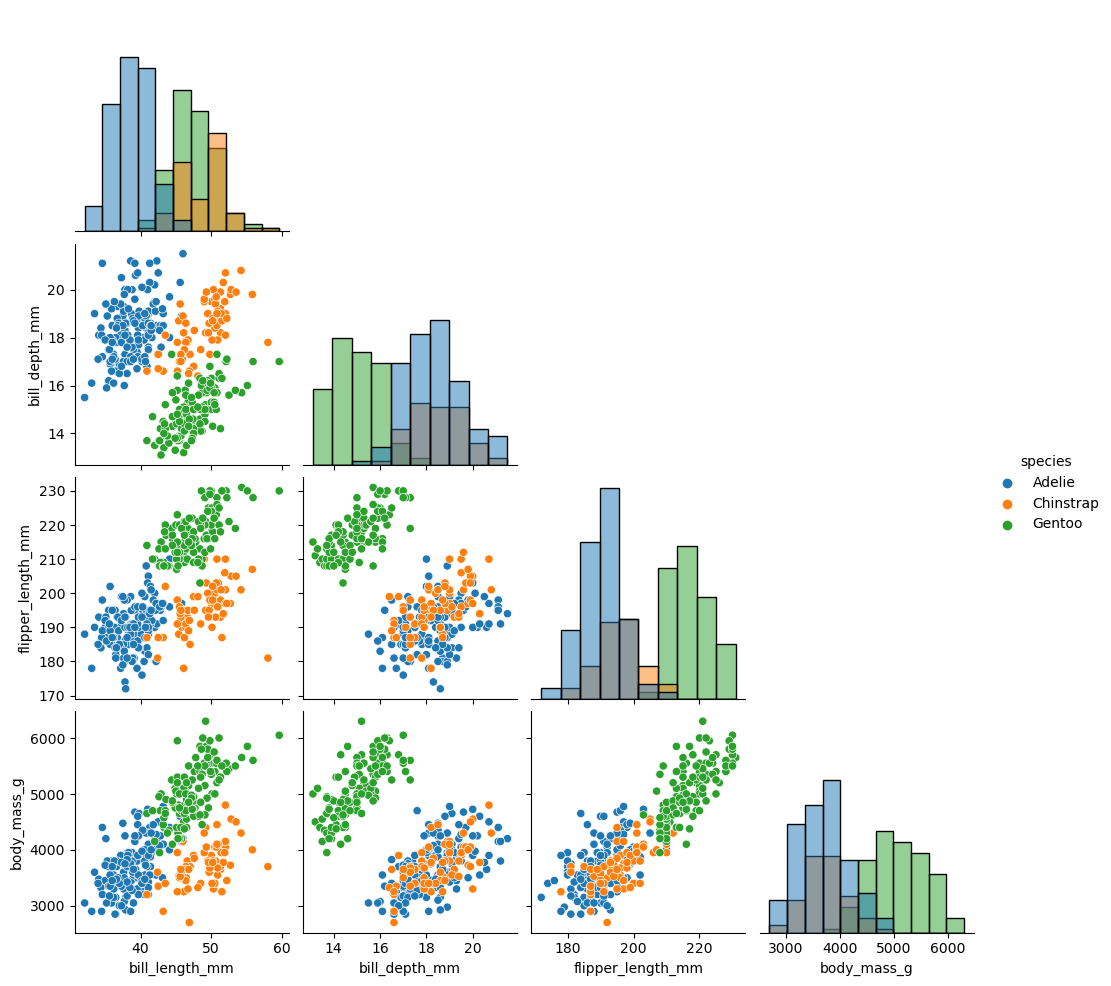

In [37]:
# tomake one sided
sns.pairplot(penguins, hue="species", diag_kind="hist", corner=True)